In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [21]:
def plot_bar_with_curve(bits, arc_easy, lambada, piqa, title="acc_bit_opt"):
    x = np.arange(len(bits))
    width = 0.2

    fig, ax = plt.subplots()

    bar1 = ax.bar(x - width, arc_easy, width, label='arc_easy')
    bar2 = ax.bar(x, lambada, width, label='lambada')
    bar3 = ax.bar(x + width, piqa, width, label='piqa')

    ax.plot(x, arc_easy, '-o')
    ax.plot(x, lambada, '-o')
    ax.plot(x, piqa, '-o')

    ax.set_xticks(x)
    ax.set_xticklabels(bits, fontsize=14)

    ax.set_xlabel('Bit', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)
#     ax.set_title('Accuracy vs Bit')
    
    ax.legend(fontsize=14, loc='upper right')
    plt.savefig(f'{title}.png', dpi=300, bbox_inches='tight')

    plt.show()

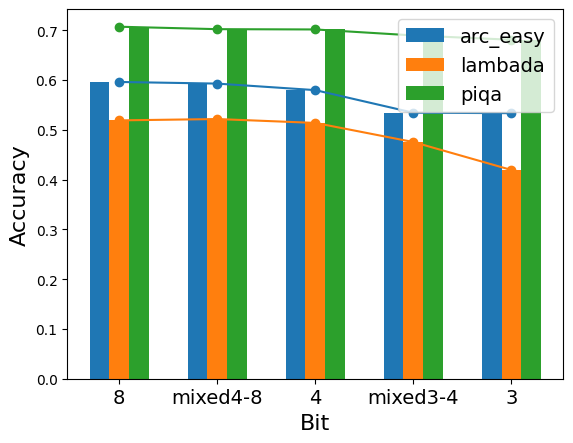

In [22]:
title = "acc_bit_bloom.png"
bits = [8, 'mixed4-8', 4, 'mixed3-4', 3]
arc_easy = [0.5963, 0.593, 0.5799, 0.5345, 0.5336]
lambada = [0.5191, 0.5218, 0.514, 0.4756, 0.4195]
piqa = [0.70729, 0.70239, 0.7018, 0.6898, 0.6811]
plot_bar_with_curve(bits, arc_easy, lambada, piqa, title)

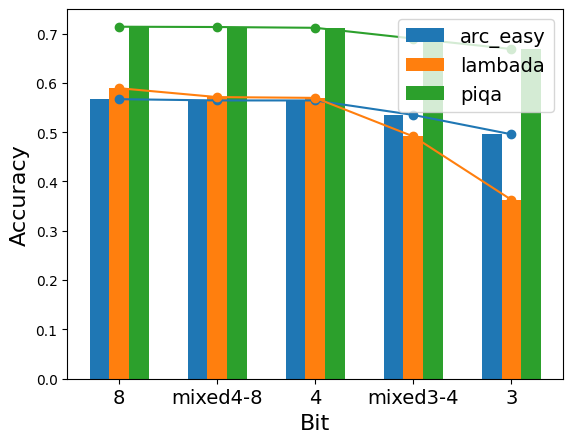

In [23]:
title = "acc_bit_opt.png"
bits = [8, 'mixed4-8', 4, 'mixed3-4', 3]
arc_easy = [0.5669, 0.5643, 0.5643, 0.5349, 0.4957]
lambada = [0.5891, 0.5711, 0.5695, 0.4913, 0.36289]
piqa = [0.7138, 0.7132, 0.7116, 0.6898, 0.6686]

plot_bar_with_curve(bits, arc_easy, lambada, piqa, title)

In [ ]:
# Motivation: Latency
# two graph, left: T4, Right V100
# batch size = 4 and 8



In [27]:
import matplotlib.pyplot as plt

def plot_performance_comparison(t4_values, v100_values, labels, x_label="Bits", y_label="Accuracy", title="Bloom-3b-C4"):
    # Set the width of the bars
    bar_width = 0.35

    # Set the x-axis positions for the bars
    t4_x = [i for i in range(len(t4_values))]
    v100_x = [i + bar_width for i in t4_x]

    # Set the figure size and font size
    plt.figure(figsize=(8, 6))
    plt.rc('font', size=14)

    # Create the bar chart
    fig, ax = plt.subplots()
    ax.bar(t4_x, t4_values, width=bar_width, label='T4')
    ax.bar(v100_x, v100_values, width=bar_width, label='V100')

    # Add value labels to the bars
    for i in range(len(t4_values)):
        if t4_values[i] != 0:
            ax.text(t4_x[i], t4_values[i], '{:.2e}'.format(t4_values[i]), ha='center', va='bottom')
        if v100_values[i] != 0:
            ax.text(v100_x[i], v100_values[i], '{:.2e}'.format(v100_values[i]), ha='center', va='bottom')

    # Set the axis labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks([i + bar_width / 2 for i in t4_x])
    ax.set_xticklabels(labels)
    ax.legend()

    # Save the figure and show the bar chart
    plt.savefig(f'{title}.png', dpi=300, bbox_inches='tight')
    plt.show()



<Figure size 800x600 with 0 Axes>

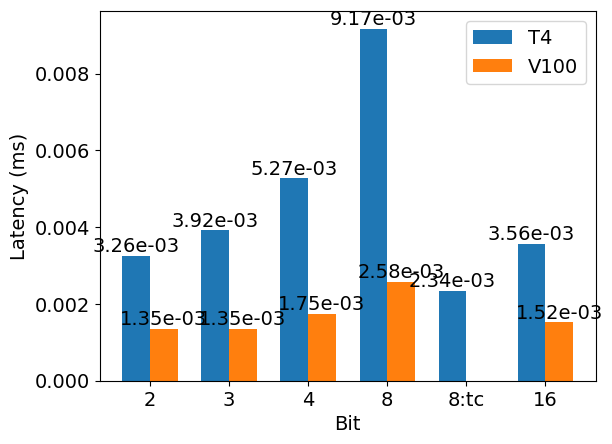

In [28]:
# Example usage
x_label = "Bit"
y_label = "Latency (ms)"
title = "T4-V100-BZ-4-vary-bit-lat"
t4_values = [0.003258668, 0.003918574, 0.005272038, 0.009167433, 0.002336669, 0.00355543]
v100_values = [0.001353238, 0.001345137, 0.001745379, 0.002575114, 0, 0.00152104]
bits = ['2', '3', '4', '8', '8:tc', '16']
plot_performance_comparison(t4_values, v100_values, bits, x_label, y_label, title)

<Figure size 800x600 with 0 Axes>

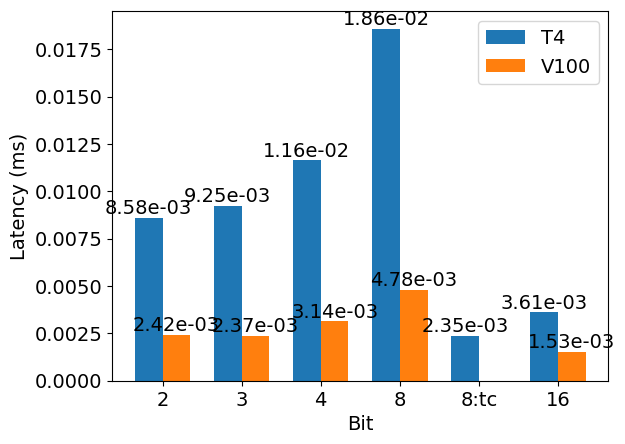

In [29]:
x_label = "Bit"
y_label = "Latency (ms)"
title = "T4-V100-BZ-8-vary-bit-lat"
t4_values = [0.008578669, 0.009248106, 0.011634881, 0.018581938, 0.002349702, 0.003609357]
v100_values = [0.002423632, 0.002365098, 0.003138848, 0.004784786,0, 0.001532745]
bits = ['2', '3', '4', '8', '8:tc', '16']
plot_performance_comparison(t4_values, v100_values, bits, x_label, y_label, title )